<a href="https://colab.research.google.com/github/JuanNoraB/cervical_cancer_cell_classification/blob/main/replication_of_results/Cell_detection_original_con_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import Counter
import cv2, os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing

Conect to the drive and load the dataset


In [ ]:
dataset_pathTRAIN = '/content/drive/MyDrive/DB_4C/train'
dataset_pathValidation = '/content/drive/MyDrive/DB_4C/validation'
NumeroImg = 4000

#Load necesary libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import Counter
import cv2, os
 #what kinds of classes are in this dataset
dataset_pathTRAINdir = os.listdir(dataset_pathTRAIN)
dataset_pathTRAINdir.sort()
print(dataset_pathTRAIN)
print("Types of classes labels found: ", len(dataset_pathTRAINdir))

dataset_pathValidationDir = os.listdir(dataset_pathValidation)
dataset_pathValidationDir.sort()
print(dataset_pathValidation)
print("Types of classes labels found: ", len(dataset_pathValidationDir))


/content/drive/MyDrive/DB_4C/train
Types of classes labels found:  4
/content/drive/MyDrive/DB_4C/validation
Types of classes labels found:  4


#Load in a list of tuples with all the elements of our data trian and validation data with their respective labels

In [ ]:
class_labels = []

print(type(dataset_pathTRAINdir))


for item in dataset_pathTRAINdir:
 print(item)

 # Get all the file names
 all_classes = os.listdir(dataset_pathTRAIN + '/' +item)
 print(all_classes)
 count = 0
 # Add them to the list
 for room in all_classes:
   
   if count <= NumeroImg:
     
      count+=1
      class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
print(class_labels)
print(len(class_labels))

<class 'list'>
1
['train_1_257.jpg', 'train_1_395.jpg', 'train_1_621.jpg', 'train_1_455.jpg', 'train_1_495.jpg', 'train_1_806.jpg', 'train_1_591.jpg', 'train_1_505.jpg', 'train_1_154.jpg', 'train_1_231.jpg', 'train_1_448.jpg', 'train_1_25.jpg', 'train_1_240.jpg', 'train_1_964.jpg', 'train_1_334.jpg', 'train_1_26.jpg', 'train_1_504.jpg', 'train_1_813.jpg', 'train_1_160.jpg', 'train_1_871.jpg', 'train_1_881.jpg', 'train_1_87.jpg', 'train_1_139.jpg', 'train_1_936.jpg', 'train_1_788.jpg', 'train_1_235.jpg', 'train_1_342.jpg', 'train_1_755.jpg', 'train_1_819.jpg', 'train_1_926.jpg', 'train_1_21.jpg', 'train_1_147.jpg', 'train_1_56.jpg', 'train_1_467.jpg', 'train_1_707.jpg', 'train_1_866.jpg', 'train_1_637.jpg', 'train_1_172.jpg', 'train_1_831.jpg', 'train_1_570.jpg', 'train_1_251.jpg', 'train_1_100.jpg', 'train_1_337.jpg', 'train_1_648.jpg', 'train_1_847.jpg', 'train_1_328.jpg', 'train_1_81.jpg', 'train_1_404.jpg', 'train_1_307.jpg', 'train_1_164.jpg', 'train_1_747.jpg', 'train_1_255.jpg', 

In [ ]:
class_labels_val = []

print(type(dataset_pathValidationDir))


for item in dataset_pathValidationDir:
 print(item)

 # Get all the file names
 all_classes = os.listdir(dataset_pathValidation + '/' +item)
 print(all_classes)
 count = 0
 # Add them to the list
 for room in all_classes:
   
   if count <= NumeroImg:
      count+=1
      class_labels_val.append((item, str('dataset_path' + '/' +item) + '/' + room))
print(class_labels_val)
print(len(class_labels_val))

<class 'list'>
1
['validation_1_54.jpg', 'validation_1_127.jpg', 'validation_1_22.jpg', 'validation_1_136.jpg', 'validation_1_48.jpg', 'validation_1_132.jpg', 'validation_1_45.jpg', 'validation_1_161.jpg', 'validation_1_68.jpg', 'validation_1_74.jpg', 'validation_1_29.jpg', 'validation_1_84.jpg', 'validation_1_23.jpg', 'validation_1_2.jpg', 'validation_1_42.jpg', 'validation_1_106.jpg', 'validation_1_98.jpg', 'validation_1_28.jpg', 'validation_1_108.jpg', 'validation_1_134.jpg', 'validation_1_168.jpg', 'validation_1_15.jpg', 'validation_1_125.jpg', 'validation_1_198.jpg', 'validation_1_143.jpg', 'validation_1_129.jpg', 'validation_1_147.jpg', 'validation_1_102.jpg', 'validation_1_55.jpg', 'validation_1_11.jpg', 'validation_1_123.jpg', 'validation_1_85.jpg', 'validation_1_12.jpg', 'validation_1_21.jpg', 'validation_1_61.jpg', 'validation_1_104.jpg', 'validation_1_173.jpg', 'validation_1_167.jpg', 'validation_1_39.jpg', 'validation_1_141.jpg', 'validation_1_71.jpg', 'validation_1_35.jpg'

##Data frame for the Data train and data validation

In [ ]:
df_train = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
df_train

,Labels,image
0,1,dataset_path/1/train_1_257.jpg
1,1,dataset_path/1/train_1_395.jpg
2,1,dataset_path/1/train_1_621.jpg
3,1,dataset_path/1/train_1_455.jpg
4,1,dataset_path/1/train_1_495.jpg
...,...,...
3995,4,dataset_path/4/train_4_956.jpg
3996,4,dataset_path/4/train_4_55.jpg
3997,4,dataset_path/4/train_4_851.jpg
3998,4,dataset_path/4/train_4_185.jpg


In [ ]:
print("Total number of images in the dataset for training: ", len(df_train))

label_count = df_train['Labels'].value_counts()
print(label_count)



Total number of images in the dataset for training:  4000
1    1000
2    1000
3    1000
4    1000
Name: Labels, dtype: int64


In [ ]:
df_val = pd.DataFrame(data=class_labels_val, columns=['Labels', 'image'])
df_val

,Labels,image
0,1,dataset_path/1/validation_1_54.jpg
1,1,dataset_path/1/validation_1_127.jpg
2,1,dataset_path/1/validation_1_22.jpg
3,1,dataset_path/1/validation_1_136.jpg
4,1,dataset_path/1/validation_1_48.jpg
...,...,...
795,4,dataset_path/4/validation_4_163.jpg
796,4,dataset_path/4/validation_4_67.jpg
797,4,dataset_path/4/validation_4_172.jpg
798,4,dataset_path/4/validation_4_27.jpg


In [ ]:
print("Total number of images in the dataset for validation are: ", len(df_val))

label_count = df_val['Labels'].value_counts()
print(label_count)

Total number of images in the dataset for validation are:  800
1    200
2    200
3    200
4    200
Name: Labels, dtype: int64


#Prepare the images for the model

In [ ]:
import cv2


im_size = 250

images_TRAIN = []
labels_TRAIN = []


for i in dataset_pathTRAINdir:
    count = 0
    data_path = dataset_pathTRAIN + '/' + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
    print(i)
    for f in filenames:
        
  
        if count <= NumeroImg:
          count +=1 
          img = cv2.imread(data_path + '/' + f)
          img = cv2.resize(img, (im_size, im_size))
          images_TRAIN.append(img)
          labels_TRAIN.append(i)
          print(count, f)

1
1 train_1_257.jpg
2 train_1_395.jpg
3 train_1_621.jpg
4 train_1_455.jpg
5 train_1_495.jpg
6 train_1_806.jpg
7 train_1_591.jpg
8 train_1_505.jpg
9 train_1_154.jpg
10 train_1_231.jpg
11 train_1_448.jpg
12 train_1_25.jpg
13 train_1_240.jpg
14 train_1_964.jpg
15 train_1_334.jpg
16 train_1_26.jpg
17 train_1_504.jpg
18 train_1_813.jpg
19 train_1_160.jpg
20 train_1_871.jpg
21 train_1_881.jpg
22 train_1_87.jpg
23 train_1_139.jpg
24 train_1_936.jpg
25 train_1_788.jpg
26 train_1_235.jpg
27 train_1_342.jpg
28 train_1_755.jpg
29 train_1_819.jpg
30 train_1_926.jpg
31 train_1_21.jpg
32 train_1_147.jpg
33 train_1_56.jpg
34 train_1_467.jpg
35 train_1_707.jpg
36 train_1_866.jpg
37 train_1_637.jpg
38 train_1_172.jpg
39 train_1_831.jpg
40 train_1_570.jpg
41 train_1_251.jpg
42 train_1_100.jpg
43 train_1_337.jpg
44 train_1_648.jpg
45 train_1_847.jpg
46 train_1_328.jpg
47 train_1_81.jpg
48 train_1_404.jpg
49 train_1_307.jpg
50 train_1_164.jpg
51 train_1_747.jpg
52 train_1_255.jpg
53 train_1_768.jpg
54 tra

In [ ]:
print(np.array(images_TRAIN).shape)
print(np.array(labels_TRAIN).shape)

(4000, 250, 250, 3)
(4000,)


In [ ]:
import cv2


im_size = 250

images_Validation = []
labels_Validation = []


for i in dataset_pathValidationDir:
    count = 0
    data_path = dataset_pathValidation + '/' + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
    print(i)
    for f in filenames:
        
  
        if count <= NumeroImg:
          count +=1 
          img = cv2.imread(data_path + '/' + f)
          img = cv2.resize(img, (im_size, im_size))
          images_Validation.append(img)
          labels_Validation.append(i)
          print(count, f)

1
1 validation_1_54.jpg
2 validation_1_127.jpg
3 validation_1_22.jpg
4 validation_1_136.jpg
5 validation_1_48.jpg
6 validation_1_132.jpg
7 validation_1_45.jpg
8 validation_1_161.jpg
9 validation_1_68.jpg
10 validation_1_74.jpg
11 validation_1_29.jpg
12 validation_1_84.jpg
13 validation_1_23.jpg
14 validation_1_2.jpg
15 validation_1_42.jpg
16 validation_1_106.jpg
17 validation_1_98.jpg
18 validation_1_28.jpg
19 validation_1_108.jpg
20 validation_1_134.jpg
21 validation_1_168.jpg
22 validation_1_15.jpg
23 validation_1_125.jpg
24 validation_1_198.jpg
25 validation_1_143.jpg
26 validation_1_129.jpg
27 validation_1_147.jpg
28 validation_1_102.jpg
29 validation_1_55.jpg
30 validation_1_11.jpg
31 validation_1_123.jpg
32 validation_1_85.jpg
33 validation_1_12.jpg
34 validation_1_21.jpg
35 validation_1_61.jpg
36 validation_1_104.jpg
37 validation_1_173.jpg
38 validation_1_167.jpg
39 validation_1_39.jpg
40 validation_1_141.jpg
41 validation_1_71.jpg
42 validation_1_35.jpg
43 validation_1_8.jpg
4

##Show Size of our data

In [ ]:
print(np.array(images_Validation).shape)
print(np.array(labels_Validation).shape)

(800, 250, 250, 3)
(800,)


In [ ]:
images_TRAIN = np.array(images_TRAIN)
labels_TRAIN=np.array(labels_TRAIN)

print(images_TRAIN.shape)
print(labels_TRAIN.shape)

(4000, 250, 250, 3)


(4000,)

In [ ]:
images_Validation = np.array(images_Validation)
labels_Validation=np.array(labels_Validation)
print(images_Validation.shape)
print(labels_Validation.shape)

(800, 250, 250, 3)
(800,)


#Prepare labels

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df_train['Labels'].values
print(y)
y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['1' '1' '1' ... '4' '4' '4']
[0 0 0 ... 3 3 3]


In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y2=df_val['Labels'].values
print(y2)
y2_labelencoder = LabelEncoder ()
y2 = y2_labelencoder.fit_transform (y2)
print (y2)

['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2

In [ ]:
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y).toarray()
Y


array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [ ]:
y2=y2.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y2 = ct.fit_transform(y2).toarray()
Y2

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [ ]:
print(images_TRAIN.shape)
print(Y.shape)
print(images_Validation.shape)
print(Y2.shape)


(4000, 250, 250, 3)
(4000, 4)
(800, 250, 250, 3)
(800, 4)


#Split the Data

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images_TRAIN, Y = shuffle(images_TRAIN, Y, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(images_TRAIN, Y, test_size=0.2, random_state=1)

images_Validation,Y2 =shuffle(images_Validation,Y2,random_state=1)

X_test, y_test = images_Validation,Y2

#inpect the shape of the training and testing.
print("Train")
print(X_train.shape)
print(y_train.shape)
print("Test")
print(X_test.shape)
print(y_test.shape)
print("Validation")
print(X_val.shape)
print(y_val.shape)

(3200, 250, 250, 3)
[1. 0. 0. 0.]
<class 'numpy.ndarray'>
Test
(800, 250, 250, 3)
(800, 4)
Validation
(800, 250, 250, 3)
(800, 4)


#Visualization Data

In [ ]:
def next_batch(batch_size, data, labels):
    idx = np.arange(0, len(data))
    np.random.shuffle(idx)
    idx = idx[: batch_size]
    data_shuffle = [data[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

def display_images(data, title, display_label = True):
    x, y = data

    
    fig, axes = plt.subplots(6, 4, figsize = (16,16))
    fig.subplots_adjust(hspace = 0.1, wspace = 0.5)
    fig.suptitle(title, fontsize = 15)

    for i, ax in enumerate(axes.flat):
        ax.imshow(x[i])
        if display_label:
            ax.set_xlabel(y[i])
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

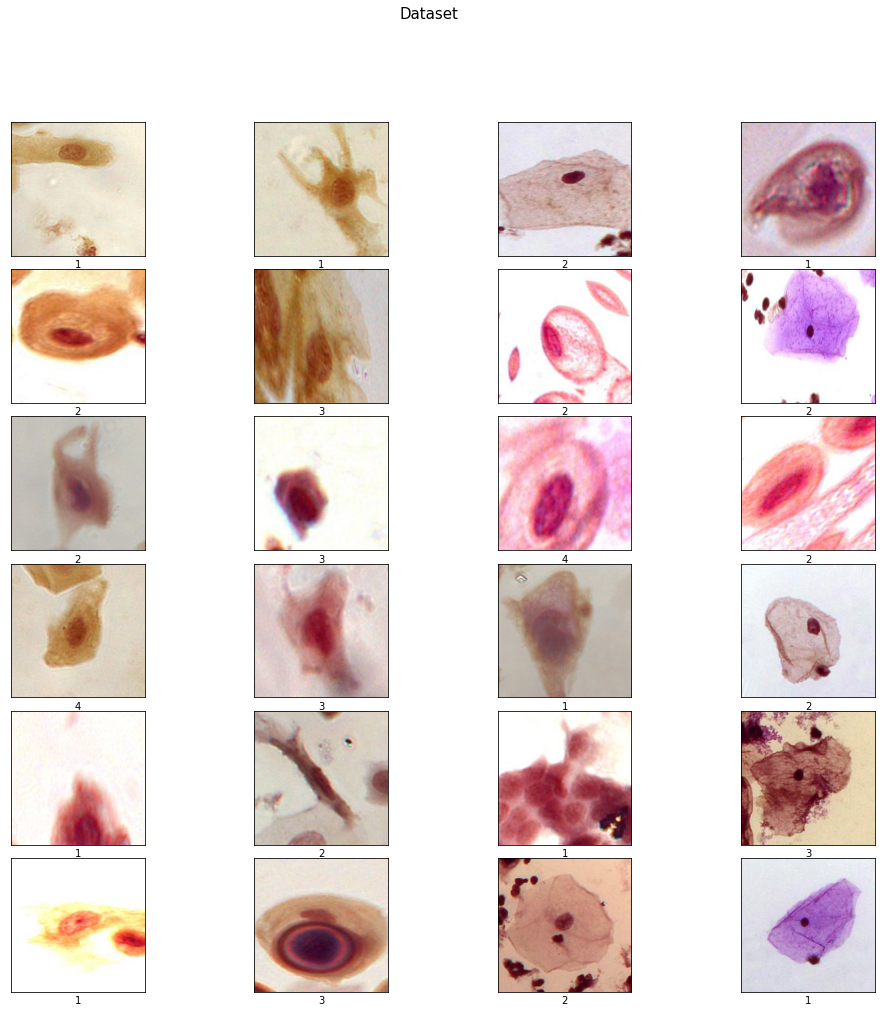

In [ ]:
display_images(next_batch(32, X_train, labels_TRAIN), title="Dataset")

# MODEL

In [ ]:
NUM_CLASSES = 4
IMG_SIZE = 250

from tensorflow import keras
from tensorflow.keras import layers, models

model = models.Sequential()

# Layer 1 - Convolutional layer with 40 filters of 3 x 3
model.add(layers.Conv2D(40, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))

# Layer 2 - Max pooling layer of 2 x 2
model.add(layers.MaxPooling2D((2, 2)))

# Layer 3 - Dropout layer set to eliminate 30% of the input
model.add(layers.Dropout(0.3))

# Layer 4 - Convolutional layer with 32 filters of 3 x 3
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

# Layer 5 - Max pooling layer of 2 x 2
model.add(layers.MaxPooling2D((2, 2)))

# Layer 6 - Dropout layer set to eliminate 30% of the input
model.add(layers.Dropout(0.3))

# Layer 7 - Convolutional layer with 32 filters of 3 x 3
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

# Layer 8 - Max pooling layer of 2 x 2
model.add(layers.MaxPooling2D((2, 2)))

# Layer 9 - Dropout layer set to eliminate 30% of the input
model.add(layers.Dropout(0.3))

# Layer 10 - Convolutional layer with 64 filters of 3 x 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Layer 11 - Max pooling layer of 2 x 2
model.add(layers.MaxPooling2D((2, 2)))

# Layer 12 - Dropout layer set to eliminate 30% of the input
model.add(layers.Dropout(0.3))

# Layer 13 - Convolutional layer with 64 filters of 3 x 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Layer 14 - Max pooling layer of 2 x 2
model.add(layers.MaxPooling2D((2, 2)))

# Layer 15 - Dropout layer set to eliminate 30% of the input
model.add(layers.Dropout(0.3))

# Layer 16 - Convolutional layer with 64 filters of 3 x 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Layer 17 - Max pooling layer of 2 x 2
model.add(layers.MaxPooling2D((2, 2)))

# Layer 18 - Dropout layer set to eliminate 30% of the input
model.add(layers.Dropout(0.3))

# Layer 19 - Flattened layer of 128 neurons
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))

# Layer 20 - Flattened layer of 64 neurons
model.add(layers.Dense(64, activation='relu'))

# Layer 21 - Output layer of 4 neurons with softmax activation
model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 40)      1120      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 40)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 124, 124, 40)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 32)      11552     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 61, 61, 32)        0

# Compile and  train the model

In [ ]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
100/100 [==============================] - 23s 107ms/step - loss: 3.5040 - accuracy: 0.2547 - val_loss: 1.3867 - val_accuracy: 0.2450
Epoch 2/100
100/100 [==============================] - 10s 102ms/step - loss: 1.3908 - accuracy: 0.2734 - val_loss: 1.3850 - val_accuracy: 0.2450
Epoch 3/100
100/100 [==============================] - 10s 101ms/step - loss: 1.3791 - accuracy: 0.2841 - val_loss: 1.3775 - val_accuracy: 0.2475
Epoch 4/100
100/100 [==============================] - 10s 102ms/step - loss: 1.3192 - accuracy: 0.3416 - val_loss: 1.3350 - val_accuracy: 0.3775
Epoch 5/100
100/100 [==============================] - 10s 103ms/step - loss: 1.2433 - accuracy: 0.4078 - val_loss: 1.3237 - val_accuracy: 0.3587
Epoch 6/100
100/100 [==============================] - 10s 104ms/step - loss: 1.1527 - accuracy: 0.4863 - val_loss: 1.2713 - val_accuracy: 0.4450
Epoch 7/100
100/100 [==============================] - 10s 100ms/step - loss: 1.0721 - accuracy: 0.5444 - val_loss: 1.2156 -

#Plot the results

In [ ]:
import matplotlib.pyplot as plt

def plot_hist(hist):
    plt.plot(hist.history["accuracy"], marker="o")
    plt.plot(hist.history["val_accuracy"], marker="s")
    
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Validation"], loc="lower right")
    plt.xticks(range(0, 110, 10)) # Agregar esta línea
    plt.yticks([x/10 for x in range(0, 11)]) # Corregir esta línea
    plt.savefig('metrics_result_train.png')
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_loss(hist, filename):
    plt.plot(hist.history["loss"], marker="o")
    plt.plot(hist.history["val_loss"], marker="s")
    
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Validation"], loc="upper right")
    plt.xticks(range(0, 110, 10))
    plt.yticks(np.arange(0, 4.1, 0.5))
    plt.savefig(filename)
    plt.show()

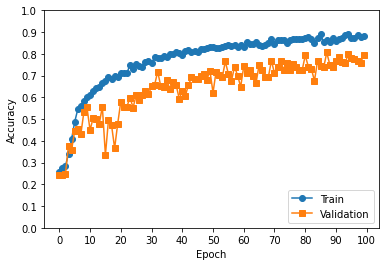

In [ ]:
plot_hist(hist)

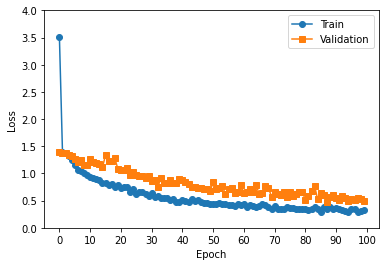

In [ ]:
plot_loss(hist, 'loss_curves_train.png')

#Test accuracy

In [ ]:
preds = model.evaluate(X_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

25/25 [==============================] - 0s 17ms/step - loss: 0.5675 - accuracy: 0.7788
Loss = 0.5674632787704468
Test Accuracy = 0.7787500023841858


#Predictions and Confuxion Matrix

In [ ]:
classes = ['1','2','3','4']

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred  = [ classes[i.argmax()] for i in y_pred ]
y_test = [classes[i.argmax()] for i in y_test]
#confusion_matrix(y_test, y_pred)

25/25 [==============================] - 0s 14ms/step


In [ ]:
print(y_pred)
print(y_test)

['4', '3', '4', '2', '4', '3', '2', '2', '2', '4', '3', '3', '1', '2', '3', '1', '1', '4', '4', '1', '4', '1', '4', '4', '4', '2', '3', '3', '4', '3', '2', '4', '1', '4', '3', '3', '4', '4', '4', '4', '4', '4', '4', '4', '3', '1', '3', '4', '4', '3', '3', '3', '3', '2', '3', '2', '1', '4', '2', '4', '1', '1', '3', '2', '4', '1', '3', '2', '2', '3', '4', '3', '1', '4', '4', '2', '4', '4', '1', '4', '4', '3', '3', '1', '4', '3', '2', '3', '1', '2', '3', '1', '4', '2', '1', '1', '4', '3', '1', '4', '2', '3', '4', '1', '1', '4', '2', '3', '4', '4', '1', '1', '3', '4', '1', '1', '1', '4', '1', '4', '3', '2', '1', '4', '2', '4', '2', '3', '2', '3', '2', '2', '3', '3', '3', '4', '4', '1', '4', '1', '1', '3', '4', '3', '4', '3', '4', '3', '3', '4', '1', '2', '3', '4', '4', '4', '4', '2', '1', '1', '1', '1', '4', '1', '1', '4', '4', '3', '1', '2', '4', '3', '1', '4', '4', '4', '1', '4', '3', '4', '4', '4', '2', '2', '1', '3', '1', '2', '2', '3', '4', '1', '4', '2', '3', '4', '1', '3', '4', '4',

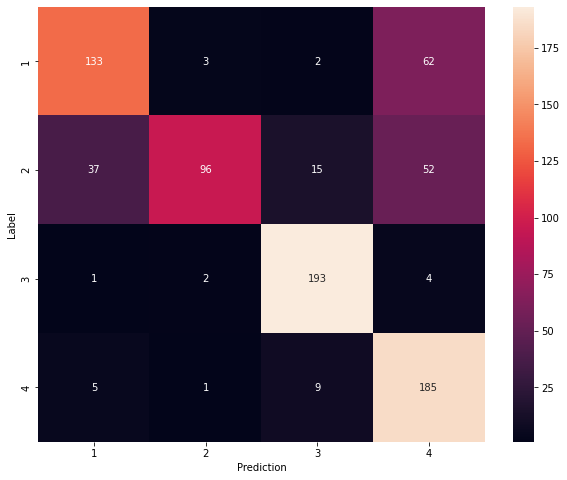

In [ ]:
import seaborn as sns
confusion_matrix(y_test, y_pred)
class_names = ["1", "2", "3", "4"]
predictions = [int(i) for i in y_pred] 
labels = [int(i) for i in y_test]
cm = tf.math.confusion_matrix(labels, predictions)
cm = cm[1:,1:]
plt.figure(figsize=(10, 8))
sns.heatmap(cm, xticklabels=class_names, yticklabels=class_names, annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.savefig('Confusion_Matrix.png')
plt.show()



In [ ]:
from tensorflow.keras.applications.imagenet_utils import preprocess_input
img= X_test[0]
x=np.expand_dims(img, axis=0)
x = preprocess_input(x)
x.shape

(1, 250, 250, 3)

In [ ]:
class_names = classes
prediction =[]
for i in X_test:
  x = np.expand_dims(i,axis=0)
  x = preprocess_input(x)
  preds=model.predict(x)
  predicted = classes[preds.argmax()]
  prediction.append(predicted)


print(prediction)


1/1 [==============================] - 0s 21ms/step
['3', '3', '3', '3', '3', '3', '3', '3', '4', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '4', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '4', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3

## Test

In [ ]:
import random
import time
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow

def results (img_path):
  classes = dataset_pathTRAINdir
  img = cv2.imread(img_path)
  img = cv2.resize(img, (250, 250))
  x = np.expand_dims(img, axis=0)
  x = preprocess_input(x)
  print('Input image shape:', x.shape)
  my_image = imread(img_path)
  imshow(my_image)
  prediction = model.predict(x)
  #predicted = classes[prediction.argmax()]
  preds = np.argmax(prediction)
  print("The predicted result: ",preds+1)
  return preds+1

Ingrese el numero del folder del dataset a tomar: 2
Ingrese el numero de imágenes a testear: 2


Ruta:  /content/drive/MyDrive/DB_4C/validation/2/validation_2_59.jpg
Input image shape: (1, 250, 250, 3)
1/1 [==============================] - 0s 22ms/step
The predicted result:  3
Categoria: Negative for intra-epithelial malignancy 

Ruta:  /content/drive/MyDrive/DB_4C/validation/2/validation_2_114.jpg
Input image shape: (1, 250, 250, 3)
1/1 [==============================] - 0s 21ms/step
The predicted result:  3
Categoria: Negative for intra-epithelial malignancy 



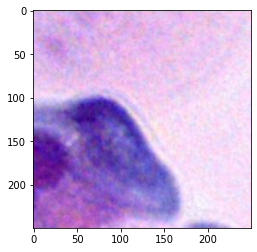

In [ ]:
a = input("Ingrese el numero del folder del dataset a tomar: ")
b = int(input("Ingrese el numero de imágenes a testear: "))
print("\n")

for i in range(0,b):
  count = 0
  value = random.randrange(1, 150, 1)
  img_path =  '/content/drive/MyDrive/DB_4C/validation/'+str(a)+'/validation_'+str(a)+'_'+str(value)+'.jpg'
  print("Ruta: ", img_path)
  final = results (img_path)
  if final == 1:
    print("Categoria: High squamous intra-epithelial lesion \n")
  elif final == 2:
    print("Categoria: Low squamous intra-epithelial lesion \n")
  elif final == 3:
    print("Categoria: Negative for intra-epithelial malignancy \n")
  elif final == 4:
    print("Categoria: Squamous cell carcinoma \n")